In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import pandas as pd

In [4]:
filePath = 'D:\\New folder\\Emotion_final.csv'
df = pd.read_csv(filePath)
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [6]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [7]:
category = pd.get_dummies(df.Emotion)
df1 = pd.concat([df, category], axis=1)
df1 = df1.drop(columns='Emotion')

In [8]:
X = df1['Text'].values
y = df1[['happy', 'sadness', 'anger', 'fear', 'love', 'surprise']].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [12]:
tokenizer = Tokenizer(num_words = 5000, oov_token='<x>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

Seq_train = tokenizer.texts_to_sequences(X_train)
Seq_test = tokenizer.texts_to_sequences(X_test)

Pad_train = pad_sequences(Seq_train)
Pad_test = pad_sequences(Seq_test)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, Flatten, LSTM,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Flatten, Input, concatenate, Conv1D, GlobalMaxPooling1D

In [16]:
model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 128)),
model.add(Conv1D(256,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add (BatchNormalization()),
model.add (Dropout(0.2)),
model.add(Conv1D(128, 5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add (BatchNormalization()),
model.add (Dropout(0.2)),
model.add(LSTM(128))
model.add (Dropout(0.2)),
model.add(Dense(32))
model.add(Dense(6))
model.add(Activation('softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 conv1d (Conv1D)             (None, None, 256)         164096    
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 256)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, None, 256)        1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         1

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    Pad_train, y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (Pad_test, y_test),
    verbose = 1,
)

Epoch 1/60
68/68 [==============================] - 11s 137ms/step - loss: 1.6146 - accuracy: 0.3284 - val_loss: 1.6687 - val_accuracy: 0.3029
Epoch 2/60
68/68 [==============================] - 10s 146ms/step - loss: 1.2633 - accuracy: 0.5182 - val_loss: 1.6220 - val_accuracy: 0.3029
Epoch 3/60
68/68 [==============================] - 9s 139ms/step - loss: 0.6092 - accuracy: 0.7834 - val_loss: 1.5041 - val_accuracy: 0.3371
Epoch 4/60
68/68 [==============================] - 10s 140ms/step - loss: 0.4032 - accuracy: 0.8559 - val_loss: 1.3194 - val_accuracy: 0.3910
Epoch 5/60
68/68 [==============================] - 10s 140ms/step - loss: 0.2904 - accuracy: 0.8951 - val_loss: 1.1503 - val_accuracy: 0.5252
Epoch 6/60
68/68 [==============================] - 10s 141ms/step - loss: 0.2300 - accuracy: 0.9176 - val_loss: 0.7727 - val_accuracy: 0.6897
Epoch 7/60
68/68 [==============================] - 10s 140ms/step - loss: 0.1957 - accuracy: 0.9296 - val_loss: 0.5155 - val_accuracy: 0.8243


In [20]:
import matplotlib.pyplot as plt

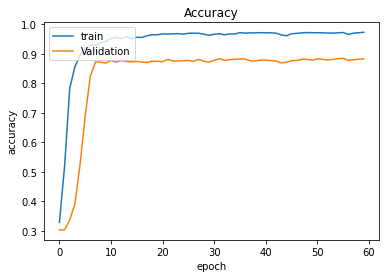

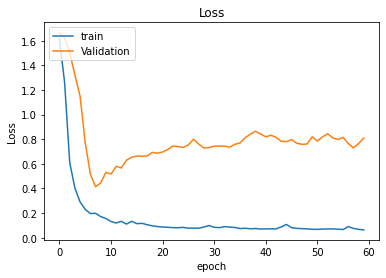

In [21]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()